In [29]:
#!unzip /content/dataset.zip

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [31]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [32]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [33]:
df.drop(columns=['Unnamed: 2','Unnamed: 3'	,'Unnamed: 4'],axis=1, inplace=True)

In [34]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [36]:
df.rename({'v1':'class','v2':'text'},axis=1,inplace=True)

In [37]:
df

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


In [43]:
df

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: xlabel='class', ylabel='count'>

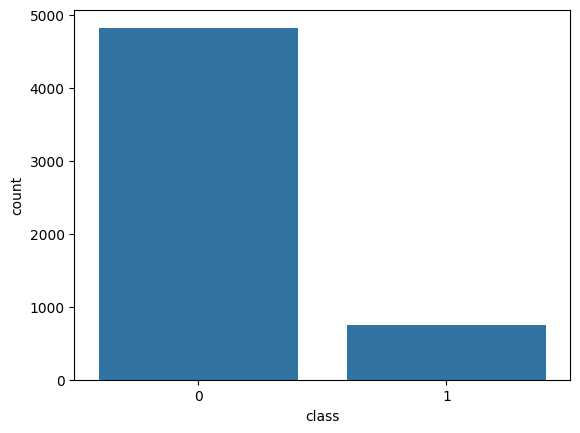

In [44]:
sns.countplot(x='class',data=df)

In [47]:
df.duplicated().sum()

403

In [50]:
df=df.drop_duplicates()

In [53]:
df.duplicated().sum()

0

In [54]:
df.isnull().sum()

class    0
text     0
dtype: int64

In [55]:
df.rename(columns={'class':'label'},inplace =True)

<ipython-input-55-550486253b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'class':'label'},inplace =True)


In [56]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [57]:
df.iloc[0]['text']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [58]:

from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:

# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [62]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [63]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:

df['text'] = df['text'].apply(data_cleaning)

<ipython-input-64-c9aefc65b7ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(data_cleaning)


In [65]:
df['text'][1]

'ok lar joking wif u oni ok lar joking wif u oni ok lar joking wif u oni ok lar joking wif u oni ok lar joking wif u oni ok lar joking wif u oni'

In [66]:
df.iloc[0]['text']

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat go until jurong point crazy available only in bugis n great world la e b

In [67]:

x = df['text']
y = df['label']

In [68]:

from sklearn.model_selection import train_test_split

In [69]:

# Lets do train-test split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

3876 3876
1293 1293


#keras embedding layer demo

In [70]:

docs = ['recurrent neural network',
		'neural network',
		'artificial neural',
		'connections between nodes',
		'can create a cycle',
		'allowing output',
		'some nodes to affect subsequent',
		'exhibit temporal',
		'dynamic behavior',
		'type of Neural Network',
    'affect subsequent']

In [72]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [77]:
tokenizer.fit_on_texts(docs)


In [78]:

sequences = tokenizer.texts_to_sequences(docs)
sequences


[[6, 1, 2],
 [1, 2],
 [7, 1],
 [8, 9, 3],
 [10, 11, 12, 13],
 [14, 15],
 [16, 3, 17, 4, 5],
 [18, 19],
 [20, 21],
 [22, 23, 1, 2],
 [4, 5]]

In [79]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences


array([[ 6,  1,  2,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 7,  1,  0,  0,  0],
       [ 8,  9,  3,  0,  0],
       [10, 11, 12, 13,  0],
       [14, 15,  0,  0,  0],
       [16,  3, 17,  4,  5],
       [18, 19,  0,  0,  0],
       [20, 21,  0,  0,  0],
       [22, 23,  1,  2,  0],
       [ 4,  5,  0,  0,  0]], dtype=int32)

In [80]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [81]:

model = Sequential()
model.add(Embedding(23,output_dim=2,input_length=5)) #Total vocab len, ouput dim(per word would be represend by 2 vector), input len per row

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 2)              46        
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#continue

In [82]:
x_train.head()

5022    anyway holla at me whenever youre around becau...
4411    if i said anything wrong sorry d if i said any...
2930    hi test on  ltgt rd  hi test on  ltgt rd  hi t...
3046    ok not much to do here though hm friday cant w...
331     maybe i could get book out tomo then return it...
Name: text, dtype: object

In [83]:

x_train.shape

(3876,)

In [85]:
## Count unique Vocabulary
all_words = [word for sentence in df.text for word in sentence.split()]

unique_words = set(all_words)
# unique_words = (all_words)
vocab_size = len(unique_words)

print("Vocabulary Size:", vocab_size)

Vocabulary Size: 8484


In [86]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)


In [87]:

sequences = tokenizer.texts_to_sequences(x_train)

In [88]:
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [89]:

sequences_matrix

array([[1337,  253,  177, ...,  282,   10, 4120],
       [   0,    0,    0, ...,  834,  124,   86],
       [   0,    0,    0, ...,   18,   21, 1768],
       ...,
       [   0,    0,    0, ...,    7,   35, 6489],
       [  14,   60,  896, ...,   81,  880,   12],
       [ 100,  184,   29, ...,   22, 1248,   18]], dtype=int32)

In [90]:

from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from keras.optimizers import RMSprop

In [91]:

# Creating model architecture

model = Sequential()
model.add(Embedding(max_words, 100, input_length = max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [93]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)


25/25 [==============================] - 44s 1s/step - loss: 0.4083 - accuracy: 0.8668 - val_loss: 0.2487 - val_accuracy: 0.9317


In [94]:

x_test

1617    did u download the fring app did u download th...
2064    pass dis to all ur contacts n see wat u get re...
1272                                                   ok
3020    am in film ill call you lat am in film ill cal...
3642    sorry left phone upstairs ok might be hectic b...
                              ...                        
5571    rofl its true to its nam rofl its true to its ...
4070    ive reached home n i bathe liao u can call me ...
4578    no plans yet what are you doing  no plans yet ...
4834    oh rite well im with my best mate pete who i w...
3896    no thank you youve been wond no thank you youv...
Name: text, Length: 1293, dtype: object

In [95]:

test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [96]:

# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

41/41 [==============================] - 6s 136ms/step - loss: 0.2751 - accuracy: 0.9258


In [97]:

lstm_prediction = model.predict(test_sequences_matrix)

41/41 [==============================] - 4s 88ms/step


In [98]:

lstm_prediction

array([[0.01887903],
       [0.01862552],
       [0.01085399],
       ...,
       [0.01737556],
       [0.02709667],
       [0.02192594]], dtype=float32)

In [99]:

res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [101]:
 #res

In [102]:

from sklearn.metrics import confusion_matrix


In [103]:
print(confusion_matrix(y_test,res))

[[1107    0]
 [  96   90]]


In [104]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [105]:

# Let's save the mdoel.
model.save("model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [106]:


import keras

In [107]:
load_model=keras.models.load_model("model.h5")

In [108]:

with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

#prediction

In [111]:

# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()

    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
# print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("hame")
else:
    print("spam")


i love this movie
i love this movie
['love movi']
1/1 [==============================] - 0s 189ms/step
pred [[0.0116896]]
hame
